# To Recognize the Animal in the Given Image

Name: Johny Ijaq  
Course: Deep Learning Bootcamp  

## **Contents**

1. Introduction
2. Data Description
3. Loading the Data
   *  Accessing the Zip File
   *  Unzipping the Zip File
   *  Accessing the CSV File
   *  Getting the name and path of all image files
   *  Confirming if no. of labels is equal to the no. of images
   *  Creating a DataFrame for image names and image paths
   *  Combining the labels with the images
   *  Loading Images
4. Pre-processing
5. Building a Multi-Layer Perceptron
6. Loss Function and Optimizer
7. Training the model
8. Tensorboard
9. Optimization Techniques 
10. Loading the test data
11. Prediction
12. Downloading the Data

# Introduction 
To build a deep learning model that recognizes the animal in the given images.


# Data Description

The training dataset consists of 1200 medium quality animal images belonging to 2 categories: mucca (cow) and pecora (sheep). All the images have been collected from "google images" and have been checked by humans. There is some erroneous data to simulate real conditions.

**train_beg.zip**: Contains the images of cows and sheeps that are to be used for training and validation of the model. Each image has a unique name like - image_1, image_2, etc. 
 
**Training_set_animals.csv**: Contains the image’s filename and their corresponding target value (i.e. the actual animal name). 

**test_beg.zip**: Contains the images of cows and sheeps whose predictions are to be submitted.
 
**Testing_set_animals.csv**: This is the order of the predictions for each image that is to be submitted on the platform. 

# Loading the Data

### 1. Accessing the Zip File

Downloading the GitHub repository

**_The first step is to download the repository 'Datasets' to the colab files. We can achieve this by executing the below code_**

In [2]:
# cloning the Datasets repository
!git clone https://github.com/dphi-official/Datasets.git

# copying the contents of the animal data folder to Google Drive
!cp -r Datasets/animal_data /content/animal_data/

Cloning into 'Datasets'...
Updating files:   0% (14/9435)
Updating files:   0% (29/9435)
Updating files:   0% (30/9435)
Updating files:   0% (72/9435)
Updating files:   0% (90/9435)
Updating files:   1% (95/9435)
Updating files:   2% (189/9435)
Updating files:   2% (231/9435)
Updating files:   3% (284/9435)
Updating files:   3% (339/9435)
Updating files:   4% (378/9435)
Updating files:   5% (472/9435)
Updating files:   5% (528/9435)
Updating files:   6% (567/9435)
Updating files:   7% (661/9435)
Updating files:   8% (755/9435)
Updating files:   8% (773/9435)
Updating files:   9% (850/9435)
Updating files:  10% (944/9435)
Updating files:  10% (1020/9435)
Updating files:  11% (1038/9435)
Updating files:  12% (1133/9435)
Updating files:  12% (1197/9435)
Updating files:  13% (1227/9435)
Updating files:  14% (1321/9435)
Updating files:  14% (1360/9435)
Updating files:  15% (1416/9435)
Updating files:  16% (1510/9435)
Updating files:  16% (1576/9435)
Updating files:  17% (1604/9435)
Updating

### 2. Unzipping the Zip File

**_We need to extract the two zip files 'test_beg.zip' which contains testing images and 'train_beg.zip' contains images for training the model_**.

In [4]:
# unzipping the contents 
!unzip animal_data/train_beg.zip    # contains images for training the model.

unzip:  cannot find either animal_data/train_beg.zip or animal_data/train_beg.zip.zip.


### 3. Accessing the CSV File

Training data was provided in two different files/folders:

1. **train_beg** folder contains all the images to be used for training the model. This can be found under the files section of Colab.  

2. **Training_set_animals.csv** - contains all the image ids from train_beg folder with their respective labels. This can be found in the **"files --> Datasets --> animal_data --> Training_set_animals.csv"**

In [3]:
#loading the required libraries
import pandas as pd
import numpy as np

# accessing the given csv file (loading the train data)
train_labels = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv')
train_labels.head()   # this file contains file name and corresponding labels

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


### 4. Getting the name and path of all image files

To get all the training images paths where the image is located

In [10]:
image_paths = [[fname, '/content/train_beg/' + fname[:-4] + '.jpg'] for fname in train_labels['filename']]
image_paths


#For Jupyter Notebook
#folder = r"" ### Add the path where your folder of images is stored inside the quotes
#For eg. folder = r"C:\Users\Johny\Downloads\train_beg\train_beg"

#image_paths = [[fname, folder + fname[:-4] + '.jpg'] for fname in labels_csv['filename']] 
#image_paths    



#The reason behind using the filename from train_labels is that 
#- it will help us to get all the images whose labels we already have in train_labels.
#- It will also help to maintain the order of the images. If we notice the images ids in train_labels, they are
#in some specific order, this will help us load all the images location in the list in the same order.


[['Image_1.jpg', '/content/train_beg/Image_1.jpg'],
 ['Image_2.jpg', '/content/train_beg/Image_2.jpg'],
 ['Image_3.jpg', '/content/train_beg/Image_3.jpg'],
 ['Image_4.jpg', '/content/train_beg/Image_4.jpg'],
 ['Image_5.jpg', '/content/train_beg/Image_5.jpg'],
 ['Image_6.jpg', '/content/train_beg/Image_6.jpg'],
 ['Image_7.jpg', '/content/train_beg/Image_7.jpg'],
 ['Image_8.jpg', '/content/train_beg/Image_8.jpg'],
 ['Image_9.jpg', '/content/train_beg/Image_9.jpg'],
 ['Image_10.jpg', '/content/train_beg/Image_10.jpg'],
 ['Image_11.jpg', '/content/train_beg/Image_11.jpg'],
 ['Image_12.jpg', '/content/train_beg/Image_12.jpg'],
 ['Image_13.jpg', '/content/train_beg/Image_13.jpg'],
 ['Image_14.jpg', '/content/train_beg/Image_14.jpg'],
 ['Image_15.jpg', '/content/train_beg/Image_15.jpg'],
 ['Image_16.jpg', '/content/train_beg/Image_16.jpg'],
 ['Image_17.jpg', '/content/train_beg/Image_17.jpg'],
 ['Image_18.jpg', '/content/train_beg/Image_18.jpg'],
 ['Image_19.jpg', '/content/train_beg/Image_19

**train_labels:** includes labels for the images  
**image_paths:** includes file paths

### 5. Confirming if no. of labels is equal to the no. of images

In [10]:
# Confirm if number of labels(from train_labels) is equal to the number of images(from image_paths) 
if len(train_labels) == len(image_paths):
  print("Number of labels i.e.", len (train_labels), "matches the number of filenames", len(image_paths))
else:
  print("Number of labels does not match the number of file names")


Number of labels i.e. 1200 matches the number of filenames 1200


### 6. Creating a DataFrame for image names and image paths

Mapping all the image paths to their respective labels in dataframe.

In [11]:
images = pd.DataFrame(image_paths)
images.columns = ['filename', 'filepath']
images.head()

,filename,filepath
0,Image_1.jpg,/content/train_beg/Image_1.jpg
1,Image_2.jpg,/content/train_beg/Image_2.jpg
2,Image_3.jpg,/content/train_beg/Image_3.jpg
3,Image_4.jpg,/content/train_beg/Image_4.jpg
4,Image_5.jpg,/content/train_beg/Image_5.jpg


### 7. Combining the labels with the images

In [13]:
#combining 'images' dataset with 'labels_csv' dataset
train_data = pd.merge(images, train_labels, how = "inner", on = "filename")  # inner: use intersection of keys from both frames.
train_data.head()                                                          # on: column or index level names to join on. These must be found in both DataFrames.

,filename,filepath,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca


In [14]:
train_data.shape

(1200, 3)

In [23]:
train_data.iloc[25]

filename                          Image_26.jpg
filepath       /content/train_beg/Image_26.jpg
animal_type                              mucca
Name: 25, dtype: object

### 8. Loading Images

OpenCV's imread method helps in reading an image and getting its pixel values. Path of each image has to be provided inside imread().

In [27]:
#imread() takes two arguments - imread(path, flag)
#The 1 in the flag parameter denotes that it is a color image, whereas 0 denotes graysacale.

#Import OpenCV module
import cv2

img_size = 100    

X_train = []   #images
y_train = []   #labels

for i in range(len(train_data)):
  image = cv2.imread(train_data["filepath"][i],1) #reading the file
  image = cv2.resize(image,(img_size,img_size)) #resize the image
  label = train_data['animal_type'] [i]
  X_train.append(image)
  y_train.append(label)

In [28]:
print("Length of X_train:", len(X_train))  # checking total number of records / data points available in the X_train dataset
print("Length of y_train:", len(y_train))  # checking total number of records / data points available in the y_train dataset

Length of X_train: 1200
Length of y_train: 1200


In [20]:
X_train[2].shape      # Checking the shape of one image

(100, 100, 3)

In [29]:
X_train[24].size  # Number of Pixels

30000

By shape of the image, we mean the shape of the NumPy array. As you see from executing the code, the matrix consists of 200 rows and 300 columns. The last value 3 indicates the no. of channels (3 for coloured image and 1 for grayscale/black & white image).


In [30]:
# To check how one image looks like

X_train[0]

array([[[206, 204, 204],
        [207, 205, 205],
        [209, 207, 207],
        ...,
        [205, 204, 206],
        [206, 205, 207],
        [205, 204, 206]],

       [[205, 203, 203],
        [207, 205, 205],
        [211, 209, 209],
        ...,
        [209, 208, 210],
        [201, 200, 202],
        [206, 205, 207]],

       [[203, 201, 201],
        [211, 209, 209],
        [210, 208, 208],
        ...,
        [205, 204, 206],
        [204, 203, 205],
        [204, 203, 205]],

       ...,

       [[248, 255, 250],
        [170, 237, 222],
        [ 90, 191, 167],
        ...,
        [254, 254, 254],
        [252, 252, 252],
        [253, 253, 253]],

       [[246, 255, 251],
        [164, 234, 220],
        [102, 202, 180],
        ...,
        [253, 253, 253],
        [251, 251, 251],
        [254, 254, 254]],

       [[242, 255, 250],
        [158, 232, 218],
        [ 87, 194, 172],
        ...,
        [252, 252, 252],
        [255, 255, 255],
        [254, 254, 254]]

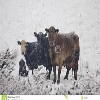

In [31]:
from google.colab.patches import cv2_imshow

cv2_imshow(X_train[0])

# Alternative: There is a function in matplotlib called as 'matshow()' which also helps to display the image of the array of numbers
# plt.matshow(X_train[0])

In [32]:
# Using y_train to cross check the label of the animal

y_train[0]

'mucca'

Label: mucca
Animal in the image 0


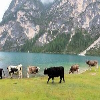

Label: mucca
Animal in the image 0


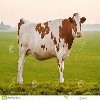

Label: mucca
Animal in the image 0


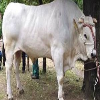

In [33]:
# Displaying the  images using OpenCVs imshow function along with corresponding labels from the training data

#Required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gc         # garbage collector for cleaning deleted data from the memory

images = X_train[1:4]
labels = y_train[1:4]

for index, image in enumerate(images):
    print ('Label:', labels[index])
    print ('Animal in the image', np.argmax(labels[index]))  #argmax picks out the label with highest probability
    #plt.imshow(image)
    cv2_imshow(image)
    #plt.show()

#Alternative: import matplotlib.image as mpimg
#for img in images[1:4]:
#  image = mpimg.imread(img)
#  imgplot = plt.imshow(image)
#  plt.show()
   

# Data Pre-processing

#### Normalizing the Data

In [34]:
train_images = X_train  #renaming
train_labels = y_train

In [35]:
#Normalization is a process that changes the range of pixel intensity values to the range 0 to 1.
#The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value.

#First we have to transfer the arrays into Numpy arrays

train_images = np.array(train_images)/ 255
#train_labels = np.array(train_labels)


In [36]:
# Transforming the labels 'mucca' and 'pecora' into 1 and 0

#for label in train_labels:
#   if 'mucca' in label:
#      train_labels.append(1)
#   elif:
#       train_labels.append(0)

In [37]:
# Transforming the labels 'mucca' and 'pecora' into 1 and 0
# label encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_labels = le.fit_transform(train_labels)


In [38]:
train_labels[1]  #check

0

In [39]:
train_labels = np.array(train_labels)
train_labels

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
train_images[1]  #check

array([[[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.70588235, 0.68235294, 0.6627451 ],
        [0.6745098 , 0.63921569, 0.62352941],
        [0.67843137, 0.63529412, 0.62352941]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.56862745, 0.54117647, 0.51372549],
        [0.54901961, 0.51764706, 0.49019608],
        [0.68235294, 0.64313725, 0.61176471]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.54117647, 0.50196078, 0.4745098 ],
        [0.49803922, 0.47058824, 0.43529412],
        [0.42745098, 0.40392157, 0.36862745]],

       ...,

       [[0.31764706, 0.71372549, 0.7254902 ],
        [0.29803922, 0.69411765, 0.70588235],
        [0.31372549, 0

In [41]:
print("No.of train_images:", len(train_images),"\n", "No.of train_labels:", len(train_labels))

No.of train_images: 1200 
 No.of train_labels: 1200


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Labels')

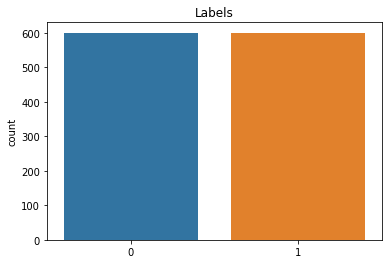

In [42]:
# crosschecking classes in train_labels. There are total 1200 labels, so there should be 600 1s and 600 0s.
import seaborn as sns

sns.countplot(train_labels)
plt.title("Labels")

In [43]:
gc.collect() #collect garbage to save memory

0

In [44]:
#check the shape of the data

print("Shape of train_images is:", train_images.shape)
print("Shape of train_labels is:", train_labels.shape)

Shape of train_images is: (1200, 100, 100, 3)
Shape of train_labels is: (1200,)


# Building a Multi-Layer Perceptron

In [45]:
#Tensorflow and tf.keras
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
%load_ext tensorboard

#Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)


2.3.0


#### Splitting the Data into Train and Test sets

In [46]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [47]:
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of train_images: (960, 100, 100, 3)
Shape of test_images: (240, 100, 100, 3)
Shape of train_labels: (960,)
Shape of test_labels: (240,)


#### Define the Model

##### Model 1

In [48]:
#Single hidden layer

# Clear any logs from previous runs
!rm -rf ./logs/ 

model1 = Sequential()
#Input layer
model1.add(Flatten(input_shape=(100, 100,3)))
#Hidden layer
model1.add(Dense(512, activation = 'relu'))
model1.add(Dense(1, activation='sigmoid'))

In [49]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               15360512  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 15,361,025
Trainable params: 15,361,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Alternative
#data_augmentation = tf.keras.Sequential(
#    [
#        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
#        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
#        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
#    ]
#)

In [ ]:
#model = Sequential()
#model.add(data_augmentation)
#model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
#model.add(tf.keras.layers.Dense(1024,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#### Compile the Model

In [50]:
optimizer = Adam(0.001) 
model1.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

Optimizer: I chose **Adam** as it converges very fast and the learning speed of the model is quite fast and efficient.  
Loss function: Since I'm working with a two-class problem, I used **binary cross-entropy loss.**  
Metrics: Since I'm doing a classification problem, the **accuracy** metric (acc) is a good choice.

# Tensorboard

In [70]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import datetime 

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


# Training the Model

In [59]:
history = model1.fit(x=train_images, 
          y=train_labels, 
          epochs=100, 
          validation_split=0.2)

Epoch 1/100
24/24 [==============================] - 0s 9ms/step - loss: 6.6520e-04 - accuracy: 1.0000 - val_loss: 1.5058 - val_accuracy: 0.6562
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 6.8379e-04 - accuracy: 1.0000 - val_loss: 1.5208 - val_accuracy: 0.6562
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 6.5065e-04 - accuracy: 1.0000 - val_loss: 1.5021 - val_accuracy: 0.6458
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 6.5355e-04 - accuracy: 1.0000 - val_loss: 1.5195 - val_accuracy: 0.6562
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 6.1956e-04 - accuracy: 1.0000 - val_loss: 1.5032 - val_accuracy: 0.6406
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 6.0583e-04 - accuracy: 1.0000 - val_loss: 1.5190 - val_accuracy: 0.6510
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 5.9836e-04 - accuracy: 1.0000 - val_loss: 1.5036 - val_ac

# Model Evaluation

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [ ]:
! kill 325

In [60]:
test_loss, test_accuracy = model1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_accuracy)

8/8 - 0s - loss: 1.6045 - accuracy: 0.6958

Test accuracy: 0.6958333253860474


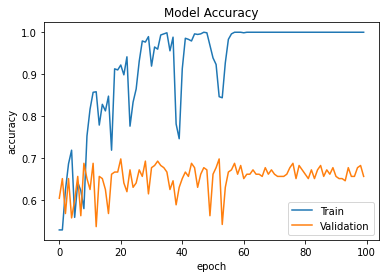

In [55]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

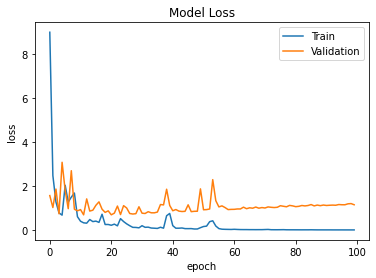

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Overfitting was observed as the model performed well on the training data but poorly on the validation data. I selected **Early stopping** as an optimization technique to combat overfitting.

# Model Optimization 

#### Early Stopping

In [61]:
earlystopping_callback = EarlyStopping(monitor = "val_loss", 
                                       min_delta = 0, 
                                       patience = 5, 
                                       verbose = 1, 
                                       mode = "auto", 
                                       baseline = None, 
                                       restore_best_weights = False)

In [71]:
history = model1.fit(x=train_images, 
          y=train_labels, 
          epochs=100, 
          validation_split=0.2,
          callbacks = [tensorboard_callback, earlystopping_callback])

Epoch 1/100
24/24 [==============================] - 1s 55ms/step - loss: 9.6407e-05 - accuracy: 1.0000 - val_loss: 1.8229 - val_accuracy: 0.6562
Epoch 2/100
24/24 [==============================] - 1s 51ms/step - loss: 9.3259e-05 - accuracy: 1.0000 - val_loss: 1.8234 - val_accuracy: 0.6510
Epoch 3/100
24/24 [==============================] - 1s 51ms/step - loss: 9.4262e-05 - accuracy: 1.0000 - val_loss: 1.8289 - val_accuracy: 0.6510
Epoch 4/100
24/24 [==============================] - 1s 51ms/step - loss: 9.1624e-05 - accuracy: 1.0000 - val_loss: 1.8293 - val_accuracy: 0.6510
Epoch 5/100
24/24 [==============================] - 1s 51ms/step - loss: 9.3647e-05 - accuracy: 1.0000 - val_loss: 1.8328 - val_accuracy: 0.6510
Epoch 6/100
24/24 [==============================] - 1s 51ms/step - loss: 8.9827e-05 - accuracy: 1.0000 - val_loss: 1.8573 - val_accuracy: 0.6562
Epoch 00006: early stopping


In [72]:
test_loss, test_accuracy = model1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_accuracy)

8/8 - 0s - loss: 1.6531 - accuracy: 0.6917

Test accuracy: 0.6916666626930237


**Summary**: There is no major change in accuracy even after optimizing the model. hence Model2 was tried with multipe layers.

#### Model 2

In [75]:
#Multiple layers

#Defining the model
model2 = Sequential()
model2.add(Dense(512, activation = 'relu', input_shape = (train_images.shape[1],)))   
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

#Compiling the model
optimizer = Adam(0.001)
model2.compile (optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])

#Early Stopping
earlystopping_callback = EarlyStopping(monitor = "val_loss", 
                                       min_delta = 0, 
                                       patience = 3, 
                                       verbose = 1, 
                                       mode = "auto", 
                                       baseline = None, 
                                       restore_best_weights = False)

#Training the model
history = model2.fit(x= train_images,
                     y =train_labels,
                     epochs = 100,
                     verbose = 1,
                     validation_split = 0.2,
                     callbacks = earlystopping_callback)

#Evaluate the model
test_loss, test_accuracy = model1.evaluate(test_images, test_labels, verbose = 1)
print('\nTest accuracy:', test_accuracy)

Epoch 1/100


ValueError: ignored

# Loading the test data

In [76]:
# unzipping the test_beg.zip file
!unzip animal_data/test_beg.zip

Archive:  animal_data/test_beg.zip
   creating: test_beg/
  inflating: test_beg/Image_1.jpg    
  inflating: test_beg/Image_10.jpg   
  inflating: test_beg/Image_100.jpg  
  inflating: test_beg/Image_101.jpg  
  inflating: test_beg/Image_102.jpg  
  inflating: test_beg/Image_103.jpg  
  inflating: test_beg/Image_104.jpg  
  inflating: test_beg/Image_105.jpg  
  inflating: test_beg/Image_106.jpg  
  inflating: test_beg/Image_107.jpg  
  inflating: test_beg/Image_108.jpg  
  inflating: test_beg/Image_109.jpg  
  inflating: test_beg/Image_11.jpg   
  inflating: test_beg/Image_110.jpg  
  inflating: test_beg/Image_111.jpg  
  inflating: test_beg/Image_112.jpg  
  inflating: test_beg/Image_113.jpg  
  inflating: test_beg/Image_114.jpg  
  inflating: test_beg/Image_115.jpg  
  inflating: test_beg/Image_116.jpg  
  inflating: test_beg/Image_117.jpg  
  inflating: test_beg/Image_118.jpg  
  inflating: test_beg/Image_119.jpg  
  inflating: test_beg/Image_12.jpg   
  inflating: test_beg/Image_12

In [77]:
new_test_ids = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv', names=['filename'])
new_test_ids.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


### Getting the name and path of all image files


In [79]:
new_image_paths = [[fname, '/content/test_beg/' + fname[:-4] + '.jpg'] for fname in new_test_ids['filename']]
new_image_paths


[['Image_1.jpg', '/content/test_beg/Image_1.jpg'],
 ['Image_2.jpg', '/content/test_beg/Image_2.jpg'],
 ['Image_3.jpg', '/content/test_beg/Image_3.jpg'],
 ['Image_4.jpg', '/content/test_beg/Image_4.jpg'],
 ['Image_5.jpg', '/content/test_beg/Image_5.jpg'],
 ['Image_6.jpg', '/content/test_beg/Image_6.jpg'],
 ['Image_7.jpg', '/content/test_beg/Image_7.jpg'],
 ['Image_8.jpg', '/content/test_beg/Image_8.jpg'],
 ['Image_9.jpg', '/content/test_beg/Image_9.jpg'],
 ['Image_10.jpg', '/content/test_beg/Image_10.jpg'],
 ['Image_11.jpg', '/content/test_beg/Image_11.jpg'],
 ['Image_12.jpg', '/content/test_beg/Image_12.jpg'],
 ['Image_13.jpg', '/content/test_beg/Image_13.jpg'],
 ['Image_14.jpg', '/content/test_beg/Image_14.jpg'],
 ['Image_15.jpg', '/content/test_beg/Image_15.jpg'],
 ['Image_16.jpg', '/content/test_beg/Image_16.jpg'],
 ['Image_17.jpg', '/content/test_beg/Image_17.jpg'],
 ['Image_18.jpg', '/content/test_beg/Image_18.jpg'],
 ['Image_19.jpg', '/content/test_beg/Image_19.jpg'],
 ['Image_20

### Confirming if no. of labels is equal to the no. of images

In [81]:
# Confirm if number of labels(from csv file) is equal to the number of images(from image_path) 
if len(new_test_ids) == len(new_image_paths):
  print("Number of labels i.e.", len (new_test_ids), "matches the number of filenames", len(new_image_paths))
else:
  print("Number of labels does not match the number of file names")

Number of labels i.e. 400 matches the number of filenames 400


### Creating a DataFrame for image names and image paths


In [86]:
new_test_data = pd.DataFrame(new_image_paths)
new_test_data.columns = ['filename', 'filepath']
new_test_data.head()

,filename,filepath
0,Image_1.jpg,/content/test_beg/Image_1.jpg
1,Image_2.jpg,/content/test_beg/Image_2.jpg
2,Image_3.jpg,/content/test_beg/Image_3.jpg
3,Image_4.jpg,/content/test_beg/Image_4.jpg
4,Image_5.jpg,/content/test_beg/Image_5.jpg


In [87]:
#combining 'new_test_images' dataset with 'new_test_labels' dataset
#new_test_images = pd.merge(new_test_images, new_test_labels, how = "inner", on = "filename")  # inner: use intersection of keys from both frames.
#new_test_images.head()  

In [88]:
new_test_data.shape

(400, 2)

In [91]:
#loading images using cv2

img_size = 100
new_test_images = []

for i in range(len(new_test_data)):
  image = cv2.imread(new_test_data["filepath"][i], 1)
  image = cv2.resize(image,(img_size,img_size))
  new_test_images.append(image)

new_test_images[1]

array([[[208, 186, 168],
        [207, 185, 167],
        [205, 183, 165],
        ...,
        [224, 206, 195],
        [223, 205, 194],
        [226, 208, 197]],

       [[209, 187, 169],
        [208, 186, 168],
        [206, 184, 166],
        ...,
        [224, 206, 195],
        [223, 205, 194],
        [227, 209, 198]],

       [[211, 189, 171],
        [210, 188, 170],
        [208, 186, 168],
        ...,
        [222, 206, 193],
        [222, 206, 193],
        [225, 209, 196]],

       ...,

       [[ 36,  89,  67],
        [  6,  44,  26],
        [ 51,  88,  71],
        ...,
        [ 51,  91,  91],
        [ 38,  82,  77],
        [ 43,  87,  83]],

       [[ 28,  77,  60],
        [ 23,  60,  44],
        [ 31,  68,  49],
        ...,
        [ 34,  72,  76],
        [ 33,  72,  73],
        [ 36,  76,  75]],

       [[ 37,  83,  70],
        [ 13,  56,  40],
        [ 33,  71,  51],
        ...,
        [ 40,  76,  82],
        [ 18,  55,  59],
        [  5,  43,  45]]

In [92]:
#Normalizing 
new_test_images = np.array(new_test_images)/255
new_test_images[1]

array([[[0.81568627, 0.72941176, 0.65882353],
        [0.81176471, 0.7254902 , 0.65490196],
        [0.80392157, 0.71764706, 0.64705882],
        ...,
        [0.87843137, 0.80784314, 0.76470588],
        [0.8745098 , 0.80392157, 0.76078431],
        [0.88627451, 0.81568627, 0.77254902]],

       [[0.81960784, 0.73333333, 0.6627451 ],
        [0.81568627, 0.72941176, 0.65882353],
        [0.80784314, 0.72156863, 0.65098039],
        ...,
        [0.87843137, 0.80784314, 0.76470588],
        [0.8745098 , 0.80392157, 0.76078431],
        [0.89019608, 0.81960784, 0.77647059]],

       [[0.82745098, 0.74117647, 0.67058824],
        [0.82352941, 0.7372549 , 0.66666667],
        [0.81568627, 0.72941176, 0.65882353],
        ...,
        [0.87058824, 0.80784314, 0.75686275],
        [0.87058824, 0.80784314, 0.75686275],
        [0.88235294, 0.81960784, 0.76862745]],

       ...,

       [[0.14117647, 0.34901961, 0.2627451 ],
        [0.02352941, 0.17254902, 0.10196078],
        [0.2       , 0

In [93]:
new_test_images.shape

(400, 100, 100, 3)

# Prediction

In [94]:
predictions = (model1.predict(new_test_images) > 0.5).astype("int32")

In [95]:
predictions.shape

(400, 1)

In [96]:
predictions[1:5]


array([[1],
       [0],
       [0],
       [1]], dtype=int32)

In [93]:
#predictions = np.array(predictions)

In [97]:
#Converting 0s and 1s to labels

image_pred = []

for i in range (len(predictions)):
    if i == 1:
       image_pred.append('mucca')
    else:
       image_pred.append('pecora')




In [98]:
image_pred[1:10]   #check

['mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora']

# Downloading the Data

In [101]:
res = pd.DataFrame({"filename": new_test_data["filename"], 'animal_type': image_pred}) 
res.to_csv("submission.csv")

# To download the csv file locally
from google.colab import files        
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>